# Analyzing the Stroop Effect


## Table of Contents

- [Background information](#BI)
- [Questions](#Qs)
- [Question 1](#Q1)
- [Question 2](#Q2)
- [Question 3](#Q3)
- [Question 4](#Q4)
- [Question 5](#Q5)
- [Conclusion](#conc)
- [Question 6](#Q6)
- [Resources](#Res)

<a id='BI'></a>
## Background information
(The following background information is excerpted from [the project instruction](https://docs.google.com/document/d/1-OkpZLjG_kX9J6LIQ5IltsqMzVWjh36QpnP2RYpVdPU/pub?embedded=True))

- In a **Stroop task**, participants are presented with a list of words, with each word displayed in a color of ink. 
- The participant’s task is to say out loud **the color of the ink** in which the word is printed.
- The task has two conditions: **a congruent words condition, and an incongruent words condition.** 
- **In the congruent words condition,** the words being displayed are color words whose names **match** the colors in which they are printed. 
- **In the incongruent words condition,** the words displayed are color words whose names **do not match** the colors in which they are printed. 
- In each case, we measure **the time it takes to name the ink colors in equally-sized lists.**
- Each participant will go through and record a time needed to complete reading two equally-sized lists of words.


**Import libraries**

In [9]:
import pandas as pd 
import numpy as np
import scipy.stats as st
import random
import matplotlib.pyplot as plt
%matplotlib inline

**Read in the Dataset**

In [10]:
df = pd.read_csv('stroopdata.csv')
df.head()

,Congruent,Incongruent
0,12.079,19.278
1,16.791,18.741
2,9.564,21.214
3,8.630,15.687
4,14.669,22.803


<a id='Qs'></a>
# Questions

<a id='Q1'></a>
## 1. What is the independent variable? What is the dependent variable?

#### The Independent Variable is the condition of the provided list of words.
As we have two conditions: **congruent and incongruent words** that are  included in two equally-sized lists. 
- **In the congruent words condition,** the words being displayed are color words whose names match the colors in which they are printed. 
- **In the incongruent words condition,** the words displayed are color words whose names do not match the colors in which they are printed. 

#### The Dependent Variable is the time spent to name the ink colors in a given list of words. 


<a id='Q2'></a>
## 2. What is an appropriate set of hypotheses for this task? Specify your null and alternative hypotheses, and clearly define any notation used. Justify your choices.

### Hypotheses:

$$H_0: \mu_i - \mu_c = 0 $$

$$H_1: \mu_i -\mu_c \neq  0 $$


 > where $\mu_i$ and $\mu_c$ are the **Population's Average Time** spent to name the ink colors of **Incongruent and Congruent** lists of words, respectively.

**Null Hypothesis** suggests that the **difference between** the average time spent to name the ink colors in an **incongruent word list** and the average time spent to name the ink colors in a **congruent word list** equals to zero. i.e. **on average, a participant needs an equal time to go through an incongruent word list compared to the one needed in the congruent condition.** 
- In other words, changing the experiment condition **will not affect** the average time needed to name the ink colors of a list which means that whether the words match the ink colors or not,this wil not have any impact on the average time required by a participant to name the ink colors.


**Alternative Hupothesis** suggests that the **difference between** the average time spent to name the ink colors in an **incongruent word list** and the average time spent to name the ink colors in a **congruent word list** does not equal to zero. i.e. on average, a participant spends more/less time to go through an incongruent word list compared to the one spent in the congruent condition. 
- In other words, on average, a participant spends **unequal time** to go through  two equally-sized lists of congruent and incongruent words. which means whether the words match the ink colors or not, wil have an impact an impact on the average time required by a participant to name the ink colors.

**The above set of Hypotheses are considered  because researchers would be interested in proving that: ( on average)  naming the ink colors differ based on the fact of wether words of a given list match the ink colors(congruent condition) or not(incongruent condition).**

### Proposing a Statistical Test

#### Considering the provided Dataset and the previously stated set of Hypotheses,a One-tailed t-test would be surely an appropriate statistical test to perform.

- **A t-test will be used for the following reasons:**
     - Our dataset contains only 24 observations and ,as known, the t-tests are most helpful with small sample sizes (n < 30), whereas z-tests are used with larger sample sizes (n > 30).
     - We don't have any population parameters provided (so a z-test would not be appropriate here).

- **A "one-tailed" test will be used for the following reasons:**
     - We are aiming to prove that there is a difference between Congruent and Incongruent conditions in terms of the Time recorded to go through a word list of a given condition. 
     - We are interested in determining if Incongruent condition scored higher than Congruent condition. The main advantage of      - Using a one-tailed test has more statistical power than a two-tailed test at the same significance (alpha) level and the results are more likely to be significant for a one-tailed test if there truly is a difference between the two conditions in the direction that  we have predicted.

#### Furthermore,our one-tailed t-test will be used with the following assumptions:
     1- The data is normally distributed.
     2- The standard deviation is unknown.
     3- Non equal Standard Deviation.

<a id='Q3'></a>
## 3. Report some descriptive statistics regarding this dataset. Include at least one measure of central tendency and at least one measure of variability.

### The Measures of central tendency include MEAN

Compute the Mean of both Congruentand and Incongruent conditions

In [11]:
df.mean()

Congruent      14.051125
Incongruent    22.015917
dtype: float64

In [12]:
df.median()

Congruent      14.3565
Incongruent    21.0175
dtype: float64

### Based on the given sample and as presented above: 

- In **Congruent condition**, where the printed color name matches the ink color in which the word is printed:
      - The Mean (average) time required to go through and read loudly a word list is around 14.05 . 
      - The Median in this condition equals 14.3565 .

- In **Incongruent condition**, where the printed color name does not match the ink color in which the word is printed:
      - The Mean (average) time required to go through and read loudly a word list is 22.016 .
      - The Median in this condition equals 21.0175  .

### The Measures of Variability are the Measures of Spread and can be computed as following:

Compute Descriptive or Summary Statistics

In [13]:
df.describe()

,Congruent,Incongruent
count,24.000000,24.000000
mean,14.051125,22.015917
std,3.559358,4.797057
min,8.630000,15.687000
25%,11.895250,18.716750
50%,14.356500,21.017500
75%,16.200750,24.051500
max,22.328000,35.255000


### As illustrated in the above summary statistics:


 - #### For the Times Recorded that are associated with Congruent condition:
        - The minimum recorded time is 8.63, while the maximum is 22.328
        - About 25% of the Times Recorded lies below 11.895 (about 75% lies above this first quartile)
        - About 50% of the Times Recorded lies below 14.357
        - About 75% of the Times Recorded lies below 16.2 (about 25% lies above this third quartile)


 - #### For the Times Recorded that are associated with Incongruent condition:
        - The minimum recorded time is 15.687, while the maximum is 35.255
        - About 25% of the Times Recorded lies below 18.72 (about 75% lies above this first quartile)
        - About 50% of the Times Recorded lies below 21.018
        - About 75% of the Times Recorded lies below 24.05 (about 25% lies above this third quartile)

<a id='Q4'></a>
## 4. Provide one or two visualizations that show the distribution of the sample data. Write one or two sentences noting what you observe about the plot or plots.

#### Plot the distribution of the recorded times in the Congruent Condition of the sample data

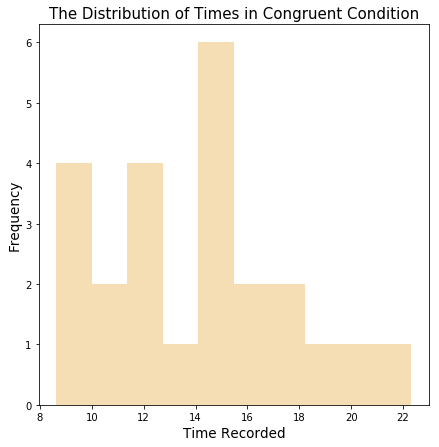

In [14]:
cong = df['Congruent']
plt.figure(figsize=(7,7))
plt.hist(cong , color = 'wheat')
plt.xlabel('Time Recorded', fontsize=13.5)
plt.ylabel('Frequency', fontsize=13.5)
plt.title('The Distribution of Times in Congruent Condition', fontsize=15);

#### Plot the distribution of the recorded times in the Incongruent Condition of the sample data

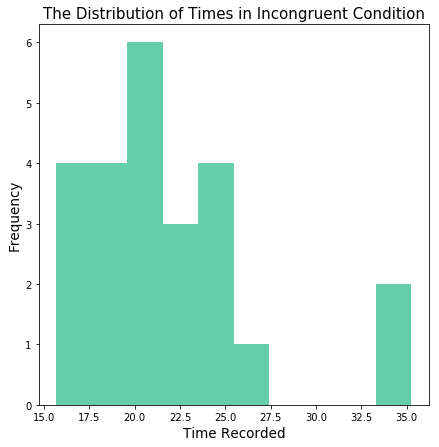

In [15]:
incong = df['Incongruent']
plt.figure(figsize=(7,7))
plt.hist(incong , color = 'mediumaquamarine')
plt.xlabel('Time Recorded', fontsize=13.5)
plt.ylabel('Frequency', fontsize=13.5)
plt.title('The Distribution of Times in Incongruent Condition', fontsize=15);

**For easier comparison,** plot the distributions of the Times Recorded for both Congruent and Incongruent conditions in a single figure

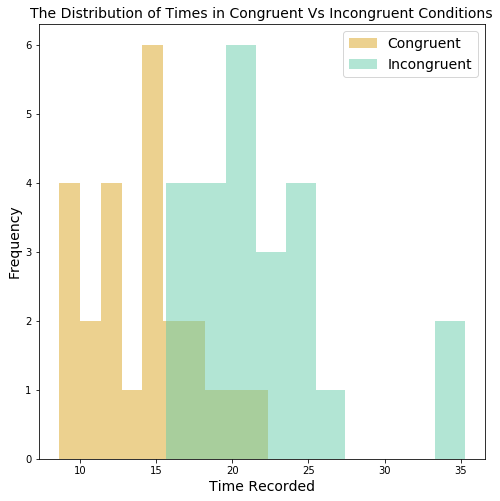

In [16]:
plt.figure(figsize=(8,8))
plt.hist(df['Congruent'], color = 'goldenrod', label = 'Congruent', alpha=0.5)
plt.hist(df['Incongruent'], color = 'mediumaquamarine', label = 'Incongruent', alpha=0.5)
plt.legend(prop={'size': 14})
plt.xlabel('Time Recorded', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title('The Distribution of Times in Congruent Vs Incongruent Conditions', fontsize=14);

### Comparing the above Histograms indicates the following:
- In general, it takes more time to go through the **Incongruent word** list than it takes to go through an equal-size list of **Congruent words.** 
- **In Incongruent condition,** the bin between 20 and 22 has the largest number of observations(6 observations), where the tallest bin **in Congruent condition** is the bin between 14 and 16 (presenting 6 observations). The locations of the tallest bins in the histigrams that represent both conditions confirm that the median of the Incongruent condition data set is higher than the one related to the Congruent condition.

<a id='Q5'></a>
## 5. Now, perform the statistical test and report your results. What is your confidence level or Type I error associated with your test? What is your conclusion regarding the hypotheses you set up? Did the results match up with your expectations? **Hint:**  Think about what is being measured on each individual, and what statistic best captures how an individual reacts in each environment.

- Confidence Interval =  %95
- Type I error = 0.05

In [22]:
#computing n 
n = len(df['Congruent'])

In [28]:
X = df['Incongruent'] - df['Congruent']
mean = X.mean() 
std = X.std()
freedom=23
CI = 0.95 #Confidence Interval
print("t-statistic = "+str(mean/(std/np.sqrt(n))))
print("critical value at the Confidence Interval = "+str(CI)+str(st.t.interval(CI,freedom)))

t-statistic = 8.02070694411
critical value at the Confidence Interval = 0.95(-2.0686576104190406, 2.0686576104190406)


<a id='conc'></a>
# Conclusion

Since the absolute value of the t-value(8.02) is greater than the critical value(2.01), **we reject the Null Hypothesis** which states that the **difference between** the average time spent to name the ink colors in an **incongruent word list** and the average time spent to name the ink colors in a **congruent word list** equals to zero. In theory, if we were able to calculate the average difference of all the participants (the population) we expect there would be a significantly slower or significantly faster time in either the incongruent or congruent condition. Considering the histograms plotted above based on the provided sample data, it was clear that, **on average, participants took more time to go through the Incongruent word list.**

<a id='Q6'></a>
## 6. What do you think is responsible for the effects observed? 

In my opinion ,I think that thee effects observed is this phenomenon is because the brain dominantly focuses on reading the word itself rather than naming the ink color on which the word is written whenever the eyes are presented with a colored word. To recognize a color, the participants needs to override his brain's natural tendency of reading the word. This overriding task takes time and  it might not succeed all the time, which leads to re-analyzing a word after an error takes place, which requires an additional time to correctly name the ink color of that word.

<a id='Res'></a>
## Resources

- https://docs.google.com/document/d/1-OkpZLjG_kX9J6LIQ5IltsqMzVWjh36QpnP2RYpVdPU/pub?embedded=True
- https://stackoverflow.com/questions/7125009/how-to-change-legend-size-with-matplotlib-pyplot
- https://www.statisticssolutions.com/should-you-use-a-one-tailed-test-or-a-two-tailed-test-for-your-data-analysis/
- https://study.com/academy/lesson/z-test-t-test-similarities-differences.html
- https://support.minitab.com/en-us/minitab-express/1/help-and-how-to/modeling-statistics/regression/supporting-topics/regression-models/using-the-t-value-to-determine-whether-to-reject-the-null-hypothesis/